#**Analysis 1.  Whether The Preferred Game Genre Differs By Region**

Conclusion : There are differences, but they are not statistically significant.

In [ ]:
# Make def to find Popular Genres TOP 5 for each region

def make_genre_sales(name,data_name):
  name = pd.DataFrame(df.groupby(['Genre'])[data_name].sum() ).head(5)
  name.reset_index(inplace=True)
  name = name.sort_values(by=data_name,ascending=False)
  sns.barplot(x='Genre', y=data_name, data=name,palette="Blues_d").set_title("Popular Genres TOP 5")
  print('#'*5,'Values','#'*5,'\n',df.groupby(['Genre'])[data_name].sum().head(5))

##### Values ##### 
 Genre
Action       21470837.28
Adventure      760101.03
Fighting      1360218.99
Misc          4090390.64
Platform      5220440.16
Name: NA_Sales, dtype: float64


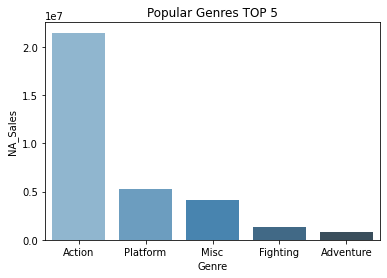

In [ ]:
make_genre_sales('NA','NA_Sales')

##### Values ##### 
 Genre
Action       7030506.61
Adventure     190063.47
Fighting     1420098.48
Misc         2820205.33
Platform     7620193.01
Name: EU_Sales, dtype: float64


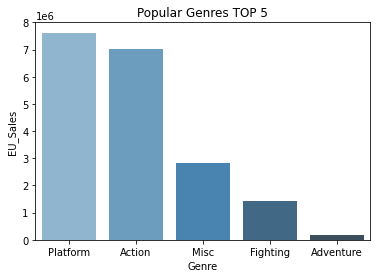

In [ ]:
make_genre_sales('EU','EU_Sales')

##### Values ##### 
 Genre
Action       1440155.16
Adventure      80051.79
Fighting     1340085.80
Misc          420103.76
Platform      790129.74
Name: JP_Sales, dtype: float64


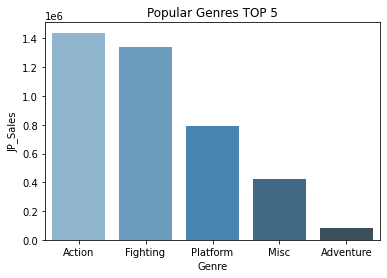

In [ ]:
make_genre_sales('JP','JP_Sales')

##### Values ##### 
 Genre
Action       1340182.65
Adventure     280016.42
Fighting      500035.65
Misc          460072.18
Platform      480050.97
Name: Other_Sales, dtype: float64


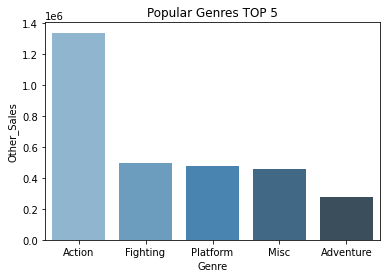

In [ ]:
make_genre_sales('Other','Other_Sales')

In [ ]:
#Analyze whether these differences are statistically significant using shapiro & kruscal
# 1) Setting Dataframe to easy to analysis
sales_data = pd.concat([df.groupby(['Genre'])['NA_Sales'].sum(), df.groupby(['Genre'])['JP_Sales'].sum(), df.groupby(['Genre'])['EU_Sales'].sum(), df.groupby(['Genre'])['Other_Sales'].sum()], axis=1)

In [ ]:
# 2) Normality Test
print(shapiro(sales_data['NA_Sales']))
print(shapiro(sales_data['JP_Sales']))
print(shapiro(sales_data['Other_Sales']))
print(shapiro(sales_data['EU_Sales']))

(0.8345112204551697, 0.023759527131915092)
(0.4866132140159607, 1.4100394764682278e-05)
(0.885897159576416, 0.10433951020240784)
(0.8641074299812317, 0.05505203828215599)


In [ ]:
# 2) sales_data['NA_Sales']'s p-value<0.05, Use Kruskal Wallis Test
s, p = stats.kruskal(sales_data['NA_Sales'], sales_data['JP_Sales'], sales_data['EU_Sales'], sales_data['Other_Sales'])
print(p.round(3), '<0.05, so not statistically significant.')

0.005 <0.05, so not statistically significant.
